In [19]:
!pip install tqdm
!pip install numpy
!pip install gensim
!pip install pandas
!pip install seaborn
!pip install ansicolors
!pip install matplotlib
!pip install matplotlib2tikz

In [3]:
import os
import re
import ast
import glob
import nltk
import tqdm
import colors
import gensim
import pprint
import matplotlib
# import numpy as np
import pandas as pd
import seaborn as sns
from colors import color
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("analysis_data/panacea_india_data_filt.csv")
emotions_observed = [ast.literal_eval(i) for i in df['emotions']]
temp = []
for item in emotions_observed: 
    temp += item
emotions_observed = sorted(list(set(temp)))

print(f"No. of emotions observed = {len(emotions_observed)}")
for emotion in emotions_observed:
    print(emotion)
print("|",end="")
for col in df.columns:
    print(col, end="|\t|")

No. of emotions observed = 11
Annoyed
Anxious
Denial
Empathetic
Joking
Official report
Optimistic
Pessimistic
Sad
Surprise
Thankful
|clean_text|	|Date|	|emotions|	|day number|	|

In [17]:
months = {'jan':0, 'feb':31, 'mar':60, 'apr':91, 'may':121, 'jun':152, 'jul':182, 'aug':213, 'sep':244, 'oct':274, 'nov':304, 'dec':335}
def day_to_date(n) :
    i = 11
    while n-list(months.values())[i]<=0:
        i -= 1
    month = list(months.keys())[i]
    day = n-list(months.values())[i]
    return month.title() + ' ' + str(day)

def date_to_day(date):
    for j, word in enumerate(date.lower().split()) :
        if word in months.keys() :
            try:
                ret_val = months[word] + int(date.lower().split()[j+1])
            except:
                raise(Exception("date format error"))
    return ret_val

def convert_dates(dates):
    res = []
    for date in dates:
        ans.append(date_to_day(date))
    return res

In [16]:
# for filtering dataset (selecting only required dates from day 61 to day 186)
df['day number'] = convert_dates(df['Date'])
df = df[df['day number'] >= 61]
df2 = df1[df1['day number'] <= 186]
print(len(df))
print(len(df1), len(df)-len(df1))
print(len(df2), len(df1)-len(df2))

140750
140750 0
140750 0


In [22]:
EMOTION = 'Surprise'
CHUNK_SIZE = 5000
FNAME = 'aspects/filtered/surprise.txt' 
STOPWORDS = sorted(list(set(stopwords.words('english'))))

In [23]:
# aspects for 
# aspects = ['Public figures and politics', 'People', 'Cases with time', 'Work and Buisness', 'Government and Policies', 'Activism']
# aspects for
aspects = ['Home Activities', 'Cases with time', 'General Politics', 'Politics and society', 'Minority issues', 'Economy, family and buisness']
# aspects for
# aspects =

f = open(FNAME,"r")
support_words = {}
for key in aspects :
    support_words[key] = []
for i, line in enumerate(f) :
    if line.split()[0] != 'Aspect':
        temp = ast.literal_eval(line)
        for j,_ in enumerate(temp) :
            temp[j] = temp[j].split('|')[0]
        temp1 = []
        for word in temp :
            if word.lower() not in STOPWORDS :
                temp1.append(word)
        support_words[aspects[int(i/2)]] = temp1
[len(support_words[k]) for k in support_words]

FileNotFoundError: [Errno 2] No such file or directory: 'aspects/filtered/surprise.txt'

In [24]:
bools = []
for l in df['emotions'] :
    l = ast.literal_eval(l)
    if EMOTION in l :
        bools.append(1)
    else :
        bools.append(0)

df[EMOTION] = bools

In [25]:
df_emotion = df[df[EMOTION] == 1]
df_emotion = df_emotion.sort_values('day number')

In [26]:
chunks = []
for i in range(int(len(df_emotion)/CHUNK_SIZE)) : 
    chunks.append(df_emotion[CHUNK_SIZE*i:CHUNK_SIZE*(i+1)])     
print(f'There are {len(chunks)} chunks')
# labels = [str(day_to_date(list(chunk['day number'])[0])) + '-' + str(day_to_date(list(chunk['day number'])[-1])) for chunk in chunks]
labels

There are 9 chunks


NameError: name 'labels' is not defined

In [30]:
counts = {}
support = {}
word_rank = {}

for k in aspects:
    for word in support_words[k]:
        word_rank[word] = 0

for k in aspects:
    counts[k] = []
    support[k] = []
    for i in range(len(chunks)):
        counts[k].append(0)
        support[k].append([])
for i, chunk in enumerate(chunks):
#     print('c')
    for item in chunk.to_dict('records'):
#         print(item)
#         break
        for word in item['clean_text'].split():
            for k in aspects:
                if word in support_words[k]:
                    counts[k][i] += 1
                    word_rank[word] += 1
                    support[k][i].append((labels[i], word))
#                 print()
#         break
#     break
# {k:v for k,v in sorted(word_rank.items(), key=lambda x: x[1], reverse=True)}

In [112]:
f = open('aspects/support_for_surprise.txt', "w")
for k in aspects:
    f.write(k+":\n")
    for i, tup in enumerate(support[k]):
        for sentence in support[k][i]:
            f.write('range: '+sentence[0]+' ### word: '+sentence[1]+'\n')
f.close()

In [31]:
counts

{'Home Activities': [314,
  540,
  614,
  525,
  676,
  553,
  478,
  512,
  413,
  517,
  433,
  477,
  530,
  470,
  466],
 'Cases with time': [1294,
  1340,
  1298,
  1512,
  1501,
  1528,
  1761,
  1736,
  1607,
  1571,
  1480,
  1835,
  1722,
  1695,
  1923],
 'General Politics': [852,
  752,
  876,
  957,
  937,
  964,
  955,
  1104,
  997,
  990,
  845,
  867,
  862,
  898,
  828],
 'Politics and society': [1492,
  1447,
  1563,
  1789,
  1838,
  2009,
  1779,
  1982,
  1750,
  1876,
  2410,
  1946,
  1933,
  1858,
  1928],
 'Minority issues': [1438,
  1503,
  1576,
  1683,
  1676,
  1608,
  1787,
  1507,
  1630,
  1792,
  1195,
  1740,
  1778,
  1879,
  1899],
 'Economy, family and buisness': [3373,
  3029,
  2465,
  2562,
  2403,
  2237,
  2506,
  2520,
  3076,
  2653,
  2775,
  2497,
  2311,
  2463,
  2471]}

In [115]:
labels = [str(list(chunk['day number'])[0]) + '-' + str(list(chunk['day number'])[-1]) for chunk in chunks]
labels

['61-83',
 '83-93',
 '93-101',
 '101-107',
 '107-114',
 '114-121',
 '121-127',
 '127-132',
 '132-138',
 '138-143',
 '143-149',
 '149-155',
 '155-164',
 '164-175',
 '175-186']

In [34]:
width=5 
xpad=20 
tpad=20 
font=25 
xlbl='dates' 
ylbl='Number of tweets with given sub-categories of Annoyed'
title_font=30

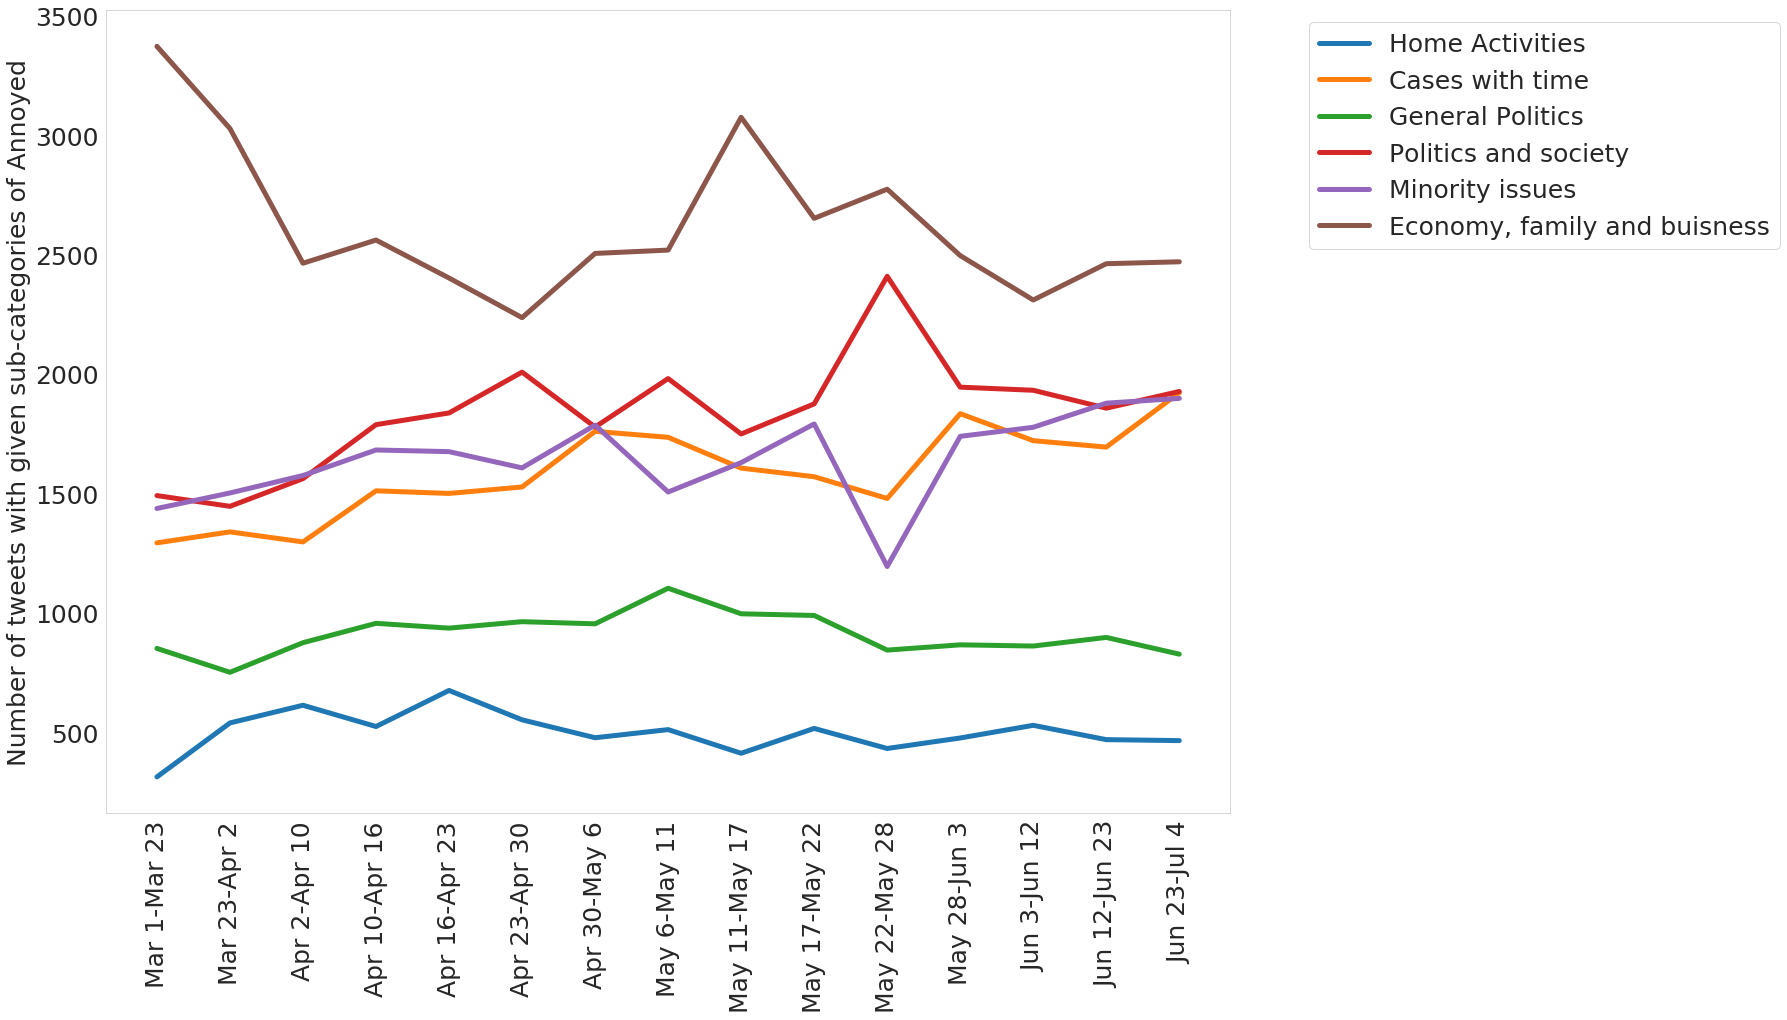

In [36]:
for aspect in aspects :
    # sns.set(font_scale=1.5)
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.rcParams["figure.figsize"] = (25.31,14.29)
    labels = [str(day_to_date(list(chunk['day number'])[0])) + '-' + str(day_to_date(list(chunk['day number'])[-1])) for chunk in chunks] 
    x = [i for i in range(len(chunks))]
    plt.xticks(x, labels=labels, rotation=90, fontsize=font)
    plt.tight_layout()
    plt.axis('on')
    plt.plot(x, counts[aspect], label=aspect, linewidth=width)
    plt.yticks(fontsize=font)
    plt.legend(loc="upper right", fontsize=font, bbox_to_anchor=(1.50,1))
#     plt.xlabel(xlbl, labelpad=xpad, fontsize=font)
    plt.ylabel(ylbl, fontsize=font)
#     for ax in plt.subplots():
#         ax.spines['bottom'].set_color('0.5')
#         ax.spines['top'].set_color('0.5')
#         ax.spines['right'].set_color('0.5')
#         ax.spines['left'].set_color('0.5')
#     plt.title(EMOTION, pad=tpad, fontsize=title_font, fontweight='bold')

# plt.show()
# plt.clf()
plt.savefig("plots/surprised_in.png")
import matplotlib2tikz
matplotlib2tikz.save("")

In [331]:
# REMOVING USELESS WORDS
## WORDS WITH VERY HIGH WORD COUNTS
word_counts = {}
for k in support_words:
    for word in support_words[k]:
        word_counts[word] = 0
for tweet in df_annoyed['clean_text'] :
    for word in tweet.split() :
        try:
            word_counts[word] += 1
        except KeyError:
            pass

In [18]:
dicts = {k:v for k,v in sorted(word_counts.items(), key=lambda x: x[1], reverse=True)}
# print(dicts)
for word in STOPWORDS :
    if dicts.__contains__(word) or dicts.__contains__(word.lower()) :
#         print(word)
        pass

NameError: name 'word_counts' is not defined

In [345]:
for tweet in df_annoyed['clean_text']:
    if 'david' in tweet.split():
        print(tweet, tweet.split().index('david'))
    elif 'David' in tweet.split():
            print(tweet, tweet.split().index('David'))

@USER Your 7:27 service from Plymouth gets extremely busy between Plymouth and Exeter St David 's with most people standing / / very crampt . The UK gov has advised social distancing and none crowded areas . Will you be doing anything to tackle COVID - 19 ? ? ? 14
Boris Johnson must impose a lockdown now | David Lammy HTTPURL 8
@USER To Boris Johnson win will Coronavirus be over I am off work for HarrowMen cap till Coronavirus win over freind from David Stephens 22
@USER David , again , not a positive word ! When you waken in the morning , say to yourself ' I need to be positive ' , because you are Captain Nego , always ! ! ! #coronavirus @USER 1
I wonder how David Cameron and Theresa May feel about Boris achieving the proper working majority they always sought and smashing down the red wall , winning the “ unwinnable ” , Sedgfield , Bolsover , Bishops Auckland ? Would love to be a fly on the wall to hear what they say in private HTTPURL 3
Just had to unfollow the owner of a cute pug o

Khan now pulling a trick from David Lammy 's book , tribalise and divide and we will get our way in the end . HTTPURL 6
HTTPURL David Lammy STILL using UK death figures to attack the Government , each devolved Government of the UK have been doing their own Covid 19 responses and are responsible for all the aspects including deaths #LabourLies #Labour #Starmer 1
@USER I agree completely with u David :hundred_points: . British empire colonial past treated ethnicity as threat thus mass atrocities committed against humanity world over be aborigines , slave trade , colonisation of British India to treatment of Labour voters , social cleansing , Covid - 19 deaths . 6
@USER @USER @USER @USER I thought you were above making sly digs about hospitality businesses struggling as a result of #COVID19 David . So much for the party of business & enterprise . 21
@USER Lengthy Interview with Dr David Hughes CMO at AIS flags a number of issues either different from GAA or not covered . One being protoco

In [83]:
curr_emotion = 'Denial'
df = pd.read_csv('gb_final_filt1.csv')
bools = []
for l in df['emotions'] :
    l = ast.literal_eval(l)
    if curr_emotion in l :
        bools.append(1)
    else :
        bools.append(0)
df[curr_emotion] = bools
df_denial = df[df[curr_emotion] == 1] 
df_denial = df_denial.sort_values('day number')
# pprint.pprint(list(df_denial['text']), width=1)
d = []
for item in zip(df_denial['day number'], df_denial['text']):
    d.append({'day number':item[0],  'text':item[1]})
# pprint.pprint(d, width=1)
d
# list(df_denial['text'])

[{'day number': 65,
  'text': "Trump calls WHO's global death rate from coronavirus 'a false number' https://t.co/tATjRDXhSg Truly, truly astonishing 😱"},
 {'day number': 70,
  'text': 'Tory health minister has got corona virus. U cannot make this shit up'},
 {'day number': 70,
  'text': 'Tory health minister has got corona virus. U cannot make this shit up'},
 {'day number': 70,
  'text': 'The real truth about coronavirus its out of control and everybody knows it if it mutates it would become a killer virus millions would die China as the biggest ECONOMY in the World but selling diseased chickens ect. Will create a VIRUS that could wipe out millions'},
 {'day number': 72,
  'text': '@RobbieDaviesJr Coronavirus isnt a new thing mate, Covid19 is a new strain of the original coronavirus. SARS &amp; Mers were both from the coronavirus.'},
 {'day number': 72,
  'text': 'The SNP will use anything - even COBRA meetings on coronavirus - to try and undermine the UK Government. https://t.co/EGC